# Cauchy Distribution

The Cauchy distribution is defined by the probability density function:

$f(x) = \dfrac{1}{\pi \, (1+x^2)}$

I was intrigued by reading that this is a "pathological" distribution in that its mean and variance do not exist. This notebook is a little numerical investigation of that fact.

First, let us plot the distribution around 0:

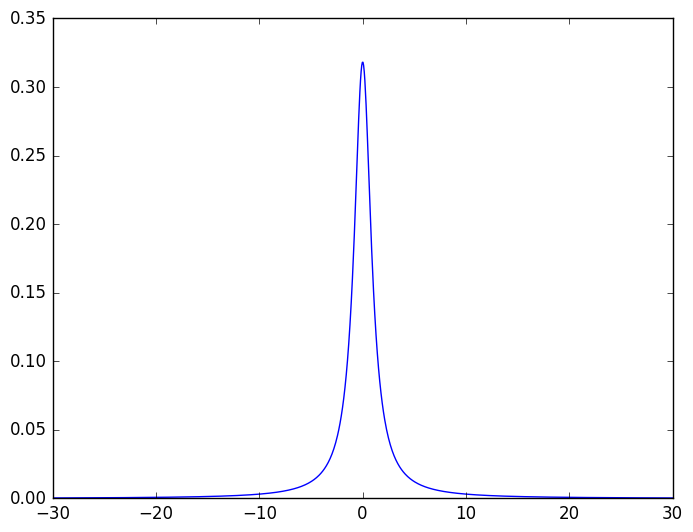

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31ab45cf8>

In [1]:
using PyPlot

cauchy(x) = 1/(pi*(1+x^2))

x = linspace(-30, 30, 1000)
y = map(cauchy, x)

plot(x, y)

At first glance it looks similar to many other distributions like the Gaussian. Surely this has a mean? It's probably zero, right?

Let's numerically compute the mean of a sample drawn from this distribution. To generate a sample, we use the fact that a random variable $X$ with a cumulative distribution function $F$ can be derived from a uniformly distributed variable $Y$ via:

$X = F^{-1}(Y)$

where $F^{-1}$ is the inverse of the CDF. For the Cauchy distribution, this works out to:

$x = tan(\pi (y - \frac{1}{2}))$

In [2]:
function sample_mean()
    x = map(y -> tan(pi * (rand() - 0.5)), 1:1000)
    mean(x)
end

sample_mean (generic function with 1 method)

Let's run this a few times. For a well-behaved distribution we'd expect the means of repeated samples to be fairly close together.

In [3]:
for i in 1:10
    println(sample_mean())
end

-0.9791583584563505
0.7562646289399171
-5.860069496169361
-0.17809833478800158
0.9510715682854204
-0.3858822194324859
0.6504126766655295
-10.027270532038779
1.4312920704851386
0.2618877687901836


We see that the mean fluctuates wildly.